In [1]:
%matplotlib inline

Often we will want to see how the choice of initial conditions affects the dynamics. We can do this by setting the initial attribute of an `rxd.Species` and rerunning.

For example, suppose at a single point we have the bistable dynamics introduced in the first part of this tutorial. That is, $u'=-u(1-u)(\alpha - u)$. (Here we use $u$ instead of a specific molecule name to indicate that we are not describing any particular molecule's kinetics, but rather modeling a class of phenomena.)

This time, we'll use an `rxd.Parameter` for $\alpha$ instead of a constant. This offers two advantages: (1) this allows $\alpha$ to vary spatially, and (2) this allows us to change the parameter values and rerun without changing the reaction/rate specification.

We start by defining the model and setting up the recordings:

In [2]:
from neuron import h, rxd
from matplotlib import pyplot as plt
h.load_file('stdrun.hoc')

soma = h.Section(name='soma')
cyt = rxd.Region([soma], name='cyt', nrn_region='i')
u = rxd.Species(cyt, name='u')
α = rxd.Parameter(cyt, initial=0.3)

rate = rxd.Rate(u, -u * (1 - u) * (α - u))

h.finitialize(-65)

t = h.Vector()
t.record(h._ref_t)
y = h.Vector()
y.record(soma(0.5)._ref_ui)

1.0

Now we define a function that sets the initial value for ca, runs the simulation, and plots the curves:

In [7]:
def plot_it(ca_init):
    u.initial = ca_init
    h.finitialize(-65)
    h.continuerun(10)
    plt.plot(t, y)

And now let's run it a few times and plot it:

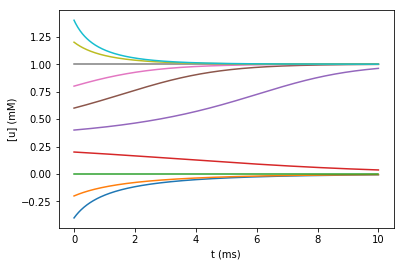

In [8]:
for u0 in range(-4, 15, 2):
    plot_it(u0 * 0.1)

plt.xlabel('t (ms)')
plt.ylabel('[u] (mM)')
plt.show()

Here we see the stable fixed points at $0$ and $1$ and how all other trajectories (except for the one starting exactly at $\alpha$, not shown) tend towards one of those values.

<hr/>

Alternatively, we might want to know how the kinetics change if we start at a fixed value (say 0.5) and vary $\alpha$ instead. We can do this in the same way as above by setting the `initial` property of $\alpha$:

In [12]:
def plot_α(α_init):
    u.initial = 0.5
    α.initial = α_init
    h.finitialize(-65)
    h.continuerun(10)
    plt.gca().plot(t, y, label='α = %g' % α_init)

Here we have added a `label` argument to the plot and explicitly specify the `gca()` axes to allow displaying a legend; see the <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html">matplotlib.pyplot.legend</a> documentation for more.

Now we run it:

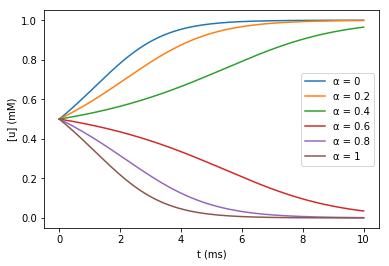

In [15]:
for my_α in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    plot_α(my_α)

plt.gca().legend()
plt.xlabel('t (ms)')
plt.ylabel('[u] (mM)')
plt.show()